In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
from PIL import Image

from pycocotools.coco import COCO

In [2]:
data_dir='/users/ujan/vlm-compositionality/data/raw/coco/'
data_type='val2017'
annFile='{}annotations/instances_{}.json'.format(data_dir,data_type)

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


/var/folders/by/rktr_w596p97pmt8_cbknvs80000gn/T/ipykernel_37321/3296860559.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_names, palette=color)


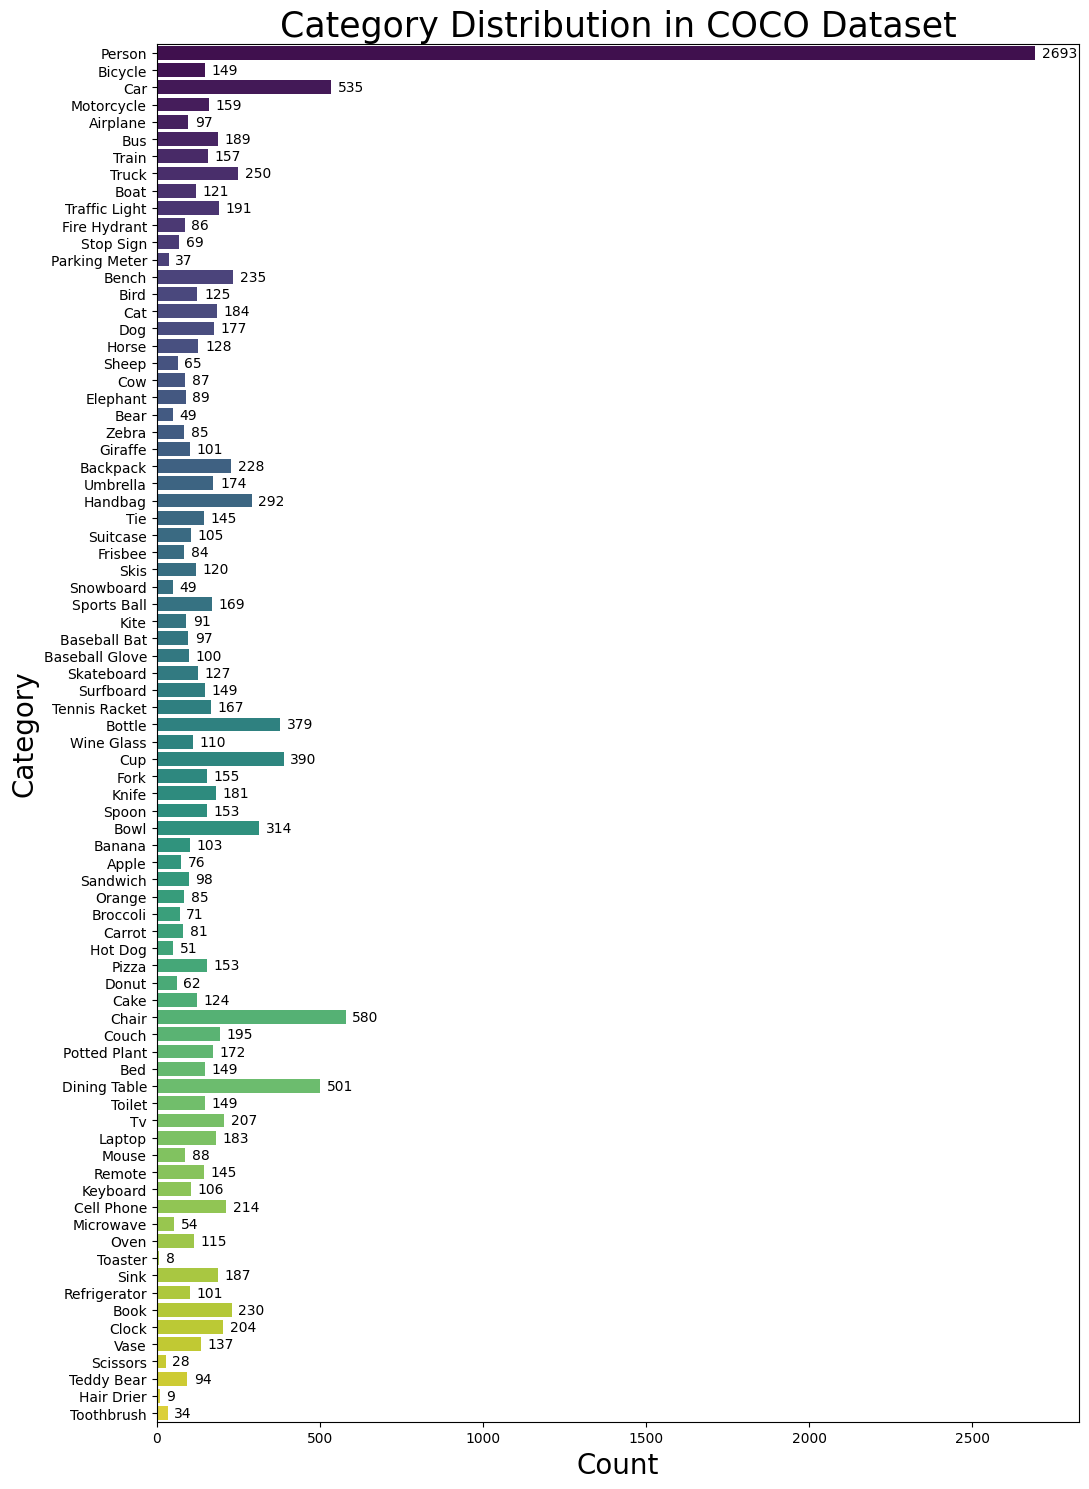

In [3]:

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

# Get category names
category_names = [cat['name'].title() for cat in cats]

# Get category counts
category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
category_counts = [len(img_ids) for img_ids in category_counts]


# Create a color palette for the plot
color = sns.color_palette('viridis', len(category_names))

# Create a horizontal bar plot to visualize the category counts
plt.figure(figsize=(11, 15))
sns.barplot(x=category_counts, y=category_names, palette=color)

# Add value labels to the bars
for i, count in enumerate(category_counts):
    plt.text(count + 20, i, str(count), va='center')
plt.xlabel('Count',fontsize=20)
plt.ylabel('Category',fontsize=20)
plt.title('Category Distribution in COCO Dataset',fontsize=25)
plt.tight_layout()
#plt.savefig('coco-cats.png',dpi=300)
plt.show()


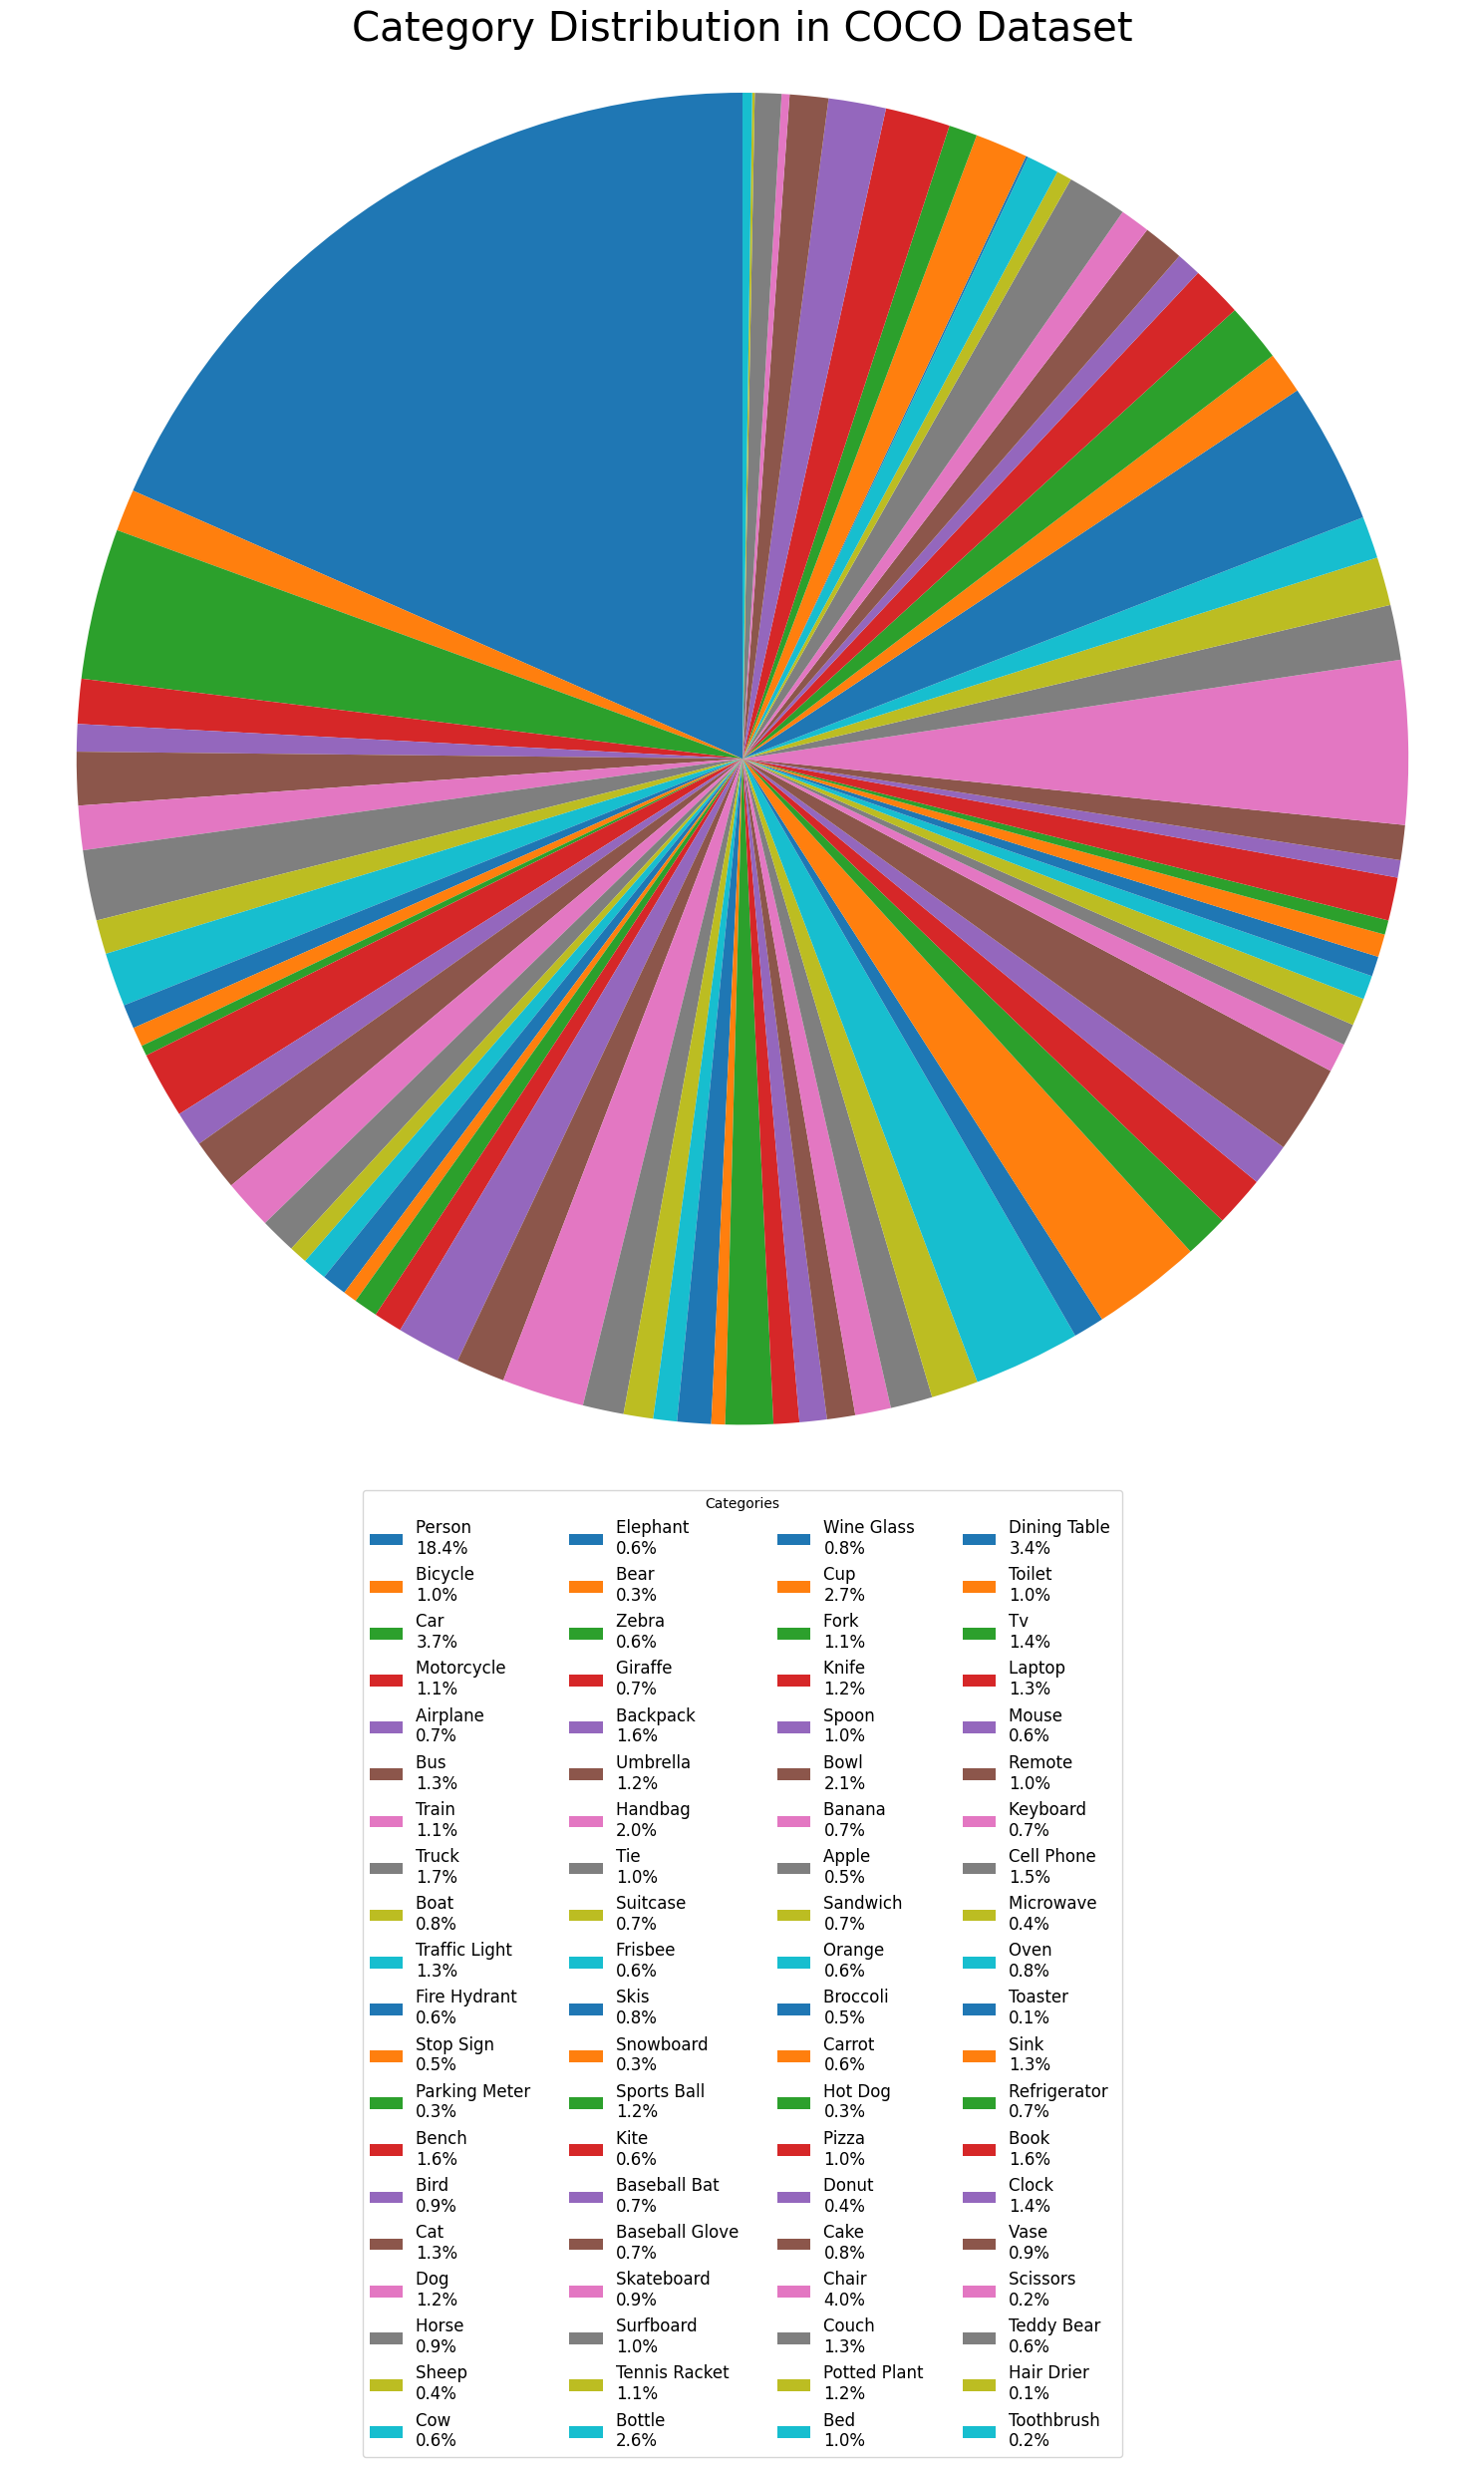

In [4]:
# Calculate percentage for each category
total_count = sum(category_counts)
category_percentages = [(count / total_count) * 100 for count in category_counts]


# Create a pie chart to visualize the category distribution
plt.figure(figsize=(15, 24.9))


# Customize labels properties
labels = [f"{name} " for name, percentage in zip(category_names, category_percentages)]
label_props = {"fontsize": 25, 
               "bbox": {"edgecolor": "white", 
                        "facecolor": "white", 
                        "alpha": 0.7, 
                        "pad": 0.5}
              }

# Add percentage information to labels, and set labeldistance to remove labels from the pie
wedges, _, autotexts = plt.pie(category_counts, 
                              autopct='', 
                              startangle=90, 
                              textprops=label_props, 
                              pctdistance=0.85)

# Create the legend with percentages
legend_labels = [f"{label}\n{category_percentages[i]:.1f}%" for i, label in enumerate(labels)]
plt.legend(wedges, legend_labels, title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.01), 
           ncol=4, fontsize=12)

plt.axis('equal')
plt.title('Category Distribution in COCO Dataset', fontsize=29)
plt.tight_layout()
#plt.savefig('coco-dis.png', dpi=300)
plt.show()


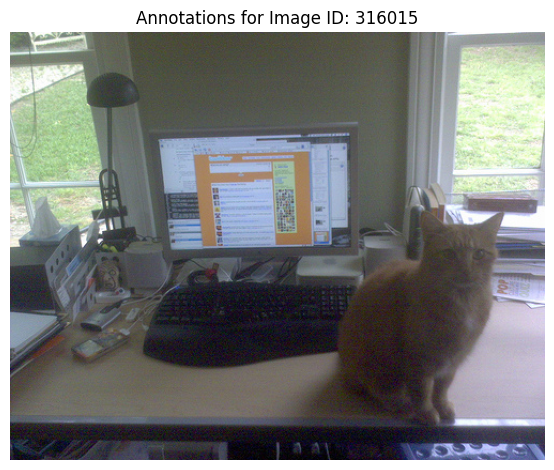

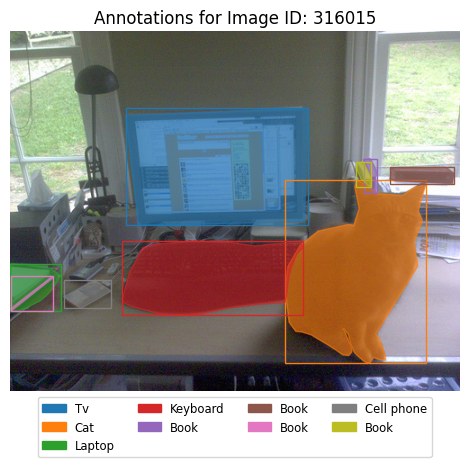

In [9]:
# Define the classes (out of the 80) which you want to see. Others will not be shown.
filterClasses = ['laptop', 'tv', 'cell phone']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)

image_dir = data_dir+"val2017/"

# Load a random image from the filtered list
if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))]  # Select a random image ID
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = image_dir + image_info['file_name']

        # Load the annotations for the image
        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        # Get category names and assign colors for annotations
        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(colors.TABLEAU_COLORS.values())

        # Load the image and plot it
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        #plt.savefig('Img.png',dpi=350)
        plt.show()
        
        plt.imshow(image)
        plt.axis('off')

        # Display bounding boxes and segmented colors for each annotation
        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            # Display bounding box
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            # Display segmentation masks with assigned colors
            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        # Create a legend with category names and colors
        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        # Show the image with legend
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        #plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")


In [10]:
seg = annotations[1]['segmentation'][0]
len(seg)

94

In [11]:
seg[:5]

[381.91, 215.71, 387.96, 196.9, 383.25]

In [105]:
# how to map pixels to patches?
# how are image tokens made from images?
poly

array([[381.91, 215.71],
       [387.96, 196.9 ],
       [383.25, 172.72],
       [385.27, 164.66],
       [400.05, 172.72],
       [409.45, 180.11],
       [426.91, 181.45],
       [436.32, 182.12],
       [447.74, 174.06],
       [458.48, 170.7 ],
       [461.84, 170.7 ],
       [453.78, 198.92],
       [458.48, 210.33],
       [449.08, 233.84],
       [453.11, 260.71],
       [406.76, 335.94],
       [410.79, 342.66],
       [416.17, 357.44],
       [417.51, 365.5 ],
       [410.12, 364.82],
       [404.08, 362.14],
       [400.05, 368.18],
       [396.02, 368.18],
       [391.99, 365.5 ],
       [386.61, 360.79],
       [382.58, 356.76],
       [378.55, 347.36],
       [375.87, 336.61],
       [370.49, 329.9 ],
       [379.22, 350.72],
       [379.9 , 356.09],
       [376.54, 360.12],
       [369.82, 359.45],
       [363.1 , 354.75],
       [351.68, 347.36],
       [340.27, 340.64],
       [334.89, 337.28],
       [324.15, 333.93],
       [317.43, 333.25],
       [310.04, 323.18],


In [88]:
img_width = image_info['width']
img_height = image_info['height']

poly = np.array(seg).reshape((len(seg) // 2, 2))
(poly[0][0]*img_width + poly[0][1])/((img_height*img_width)/576)

550.5716448

In [100]:
poly[1]

array([387.96, 196.9 ])

In [101]:
num_patches = 24
poly = np.array(seg).reshape((len(seg) // 2, 2))

patch = (poly[0][0]*img_width + poly[0][1])/((img_height*img_width)/576)
r = (patch/num_patches)+1
c = patch%num_patches
print(r, c)

23.940485199999998 22.571644799999945


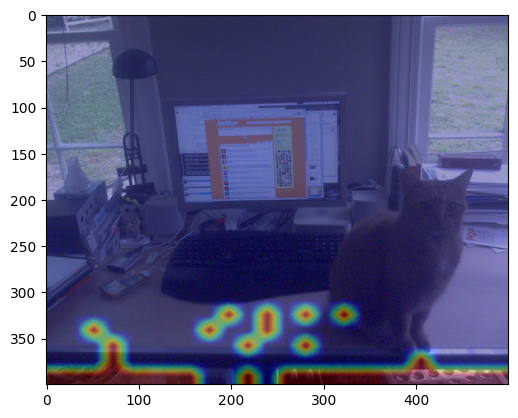

In [96]:
num_patches = 24
img_width = image_info['width']
img_height = image_info['height']

#segmentation = np.random.rand(num_patches, num_patches).astype(float)
segmentation = np.zeros((num_patches, num_patches)).astype(float)
for p in poly:
    patch = (p[0]*img_width + p[1])/((img_height*img_width)/576)
    r = (patch/num_patches)+1
    r = r if r<=23 else 23
    c = patch%num_patches
    c = c if c<=23 else 23
    segmentation[int(r), int(c)] = 1.0

segmentation_resized = (np.array(Image.fromarray(segmentation).resize((img_width, img_height), Image.BILINEAR)))
plt.imshow(image)
plt.imshow(segmentation_resized, cmap='jet', interpolation='bilinear', alpha=.4)
plt.show()

In [93]:
np.max((5,3))

5

In [27]:
segmentation[15:, 15:].shape

(9, 9)

In [28]:
np.ones((num_patches, num_patches)).astype(float)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 

In [31]:
poly = np.array(seg).reshape((len(seg) // 2, 2))

In [34]:
poly[0]

array([381.91, 215.71])

In [42]:
img_height*img_width

200000

In [43]:
segmentation.shape

(24, 24)

In [44]:
24*24

576

In [45]:
(img_height*img_width)/576

347.22222222222223

In [47]:
segmentation_resized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

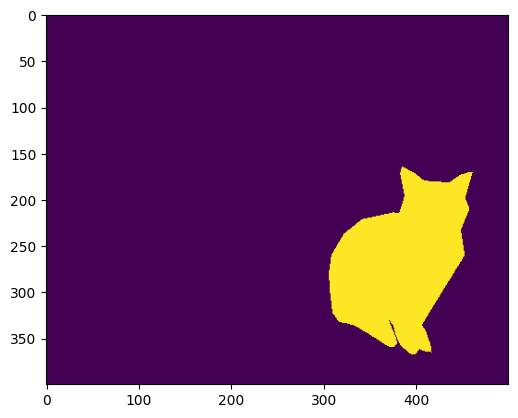

In [111]:
m = coco.annToMask(annotations[1])
plt.imshow(m)
plt.show()

In [114]:
np.nonzero(m)

(array([165, 165, 166, ..., 367, 367, 367]),
 array([385, 386, 385, ..., 397, 398, 399]))

In [118]:
m[166][386]

1